One of the important tasks during EDA is describing the relatioship between the attributes of a dataset. In general, the relationship between two continuous variables can be described using techniques that compute the covariance and correlation between the attributes. 
 

***Covariance***

Covariance is a measure of how two variables X and Y change together linearly, given a population of size $n$, and it is calculated as follows: 

$COV[X,Y] = E[(X-E[X])(Y-E[Y])] = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n}$

The sign of the covariance indicates the direction of the relationship between the variables:
- when $COV[X,Y]>0$, $X$ and $Y$ increase and decrease together. 
- when $COV[X,Y]<0$, $X$ tends to decrease while $Y$ tends to increase and viceversa.
- when $COV[X,Y]=0$, $X$ and $Y$ do not display any of the above two tendencies. No linear relationship between $X$ and $Y$. 

Drawback: 
Covariance can only measure the directional relationship between $X$ and $Y$. It cannot show the strength (or magnitude) of the relationship between $X$ and $Y$. Covariance is also very sensitive to the presence of outliers. On the other hand, the correlation coefficients offer a more robust standard of the relationship between variables $X$ and $Y$ as correlation coefficients are less susceptible to outliers and provide a better measure of strength of the relatioship between variables $X$ and $Y$.



***Correlation***

Correlation can measure the linear relationship between two variables $X$ and $Y$ using the Pearson correlation coefficient, which is the most commonly used measure of correlation for continuous variables.

\begin{align*}
\rho_{X,Y} &= \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} \\
\text{cov}(X,Y) &= \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n} \\
\sigma_X &= \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n}} \\
\sigma_Y &= \sqrt{\frac{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}{n}}
\end{align*}


These formulas are used to compute the Pearson correlation coefficient, which measures the strength and direction of the linear relationship between two variables $X$ and $Y$, where $n$ is the total number of data points. 



**Difference between Covariance vs Correlation**

|    |                    Covariance                                | Correlation |
|----------|--------------------------------------------------------------|-------------|
|Definition| Measures direction of the linear relationship | Measures the strength and direction of the linear relationship        |
| Range   | ($-\infty$ , $+\infty$)| [-1 , 1]         |
| Units   | Has units – the product of the units of the two variables.  | No units, a standardized measure.         |
| Normalization    | Not normalized – the magnitude depends on the scale of the variables.  |       Normalized – independent of the scale of variables.   |
| Sensitivity    |   Sensitive to outliers.       | Less susceptible to outliers. |




* Disclaimer: When the relationship between the two continuous variables is not linear, when the variables don't have a normal distribution ***Spearman's correlation coefficient*** is used. The range of the correlation is [-1,+1]. 

![Image Title](spearsman.png)

Here is a sample example, showing how spearsman correlation is computed between two attributes using their ranks: https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php

Note that in the above link, the ranks for each attribute are computed as follows: the largest value gets rank 1, the next largest value gets rank 2, so forth. 


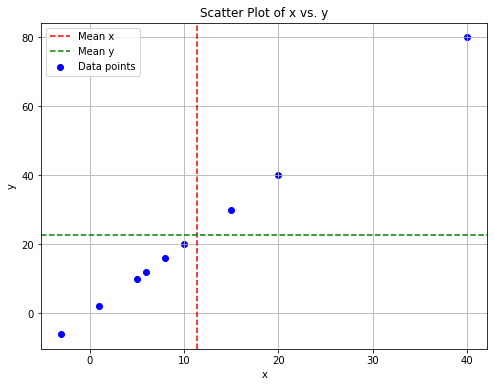

Covariance between x and y: 289.77777777777777


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.array([5, -3, 6, 1, 8, 10,15,20,40]) 
y = np.array([10, -6, 12, 2,16,20,30,40, 80])  

# Compute mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Compute covariance
covariance = np.sum((x - mean_x) * (y - mean_y)) / len(x)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs. y')

# Add mean lines
plt.axvline(x=mean_x, color='red', linestyle='--', label='Mean x')
plt.axhline(y=mean_y, color='green', linestyle='--', label='Mean y')

plt.legend()
plt.grid(True)
plt.show()

print("Covariance between x and y:", covariance)



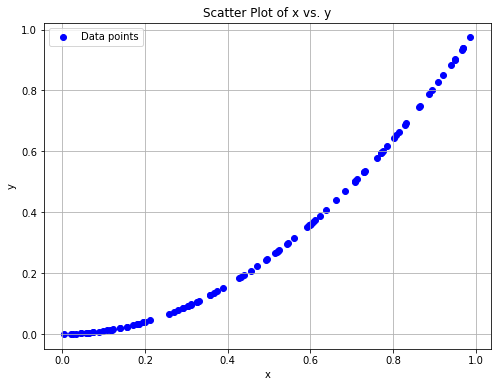

Pearson correlation coefficient between x and y: 0.9687601138878865


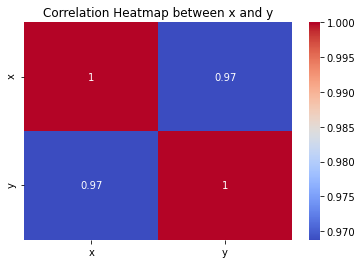

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data linearly correlated
# x = np.array([5, -3, 6, 1, 8, 10,15,20,40]) 
# y = np.array([10, -6, 12, 2,16,20,30,40, 80])  

# Example data for variables X and Y (nonlinearly correlated)
x = np.linspace(0, 10, 100)
y = np.sin(x)  # Y is a sinusoidal function of X

# Add some random noise to Y to make the relationship less perfect
np.random.seed(42)  # for reproducibility
y += np.random.normal(0, 0.1, size=y.shape)

# Compute Pearson correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs. y')

plt.legend()
plt.grid(True)
plt.show()

print("Pearson correlation coefficient between x and y:", correlation_coefficient)


# Create a heatmap for the correlation matrix
data = np.vstack((x, y))
correlation_matrix = np.corrcoef(data)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['x', 'y'], yticklabels=['x', 'y'])
plt.title('Correlation Heatmap between x and y')
plt.show()


In [40]:
# Lets try Spearsman correlation
import numpy as np

# Generate correlated data
np.random.seed(42)
X = np.random.rand(100)  # Generate random values for X
Y = X**2  # Create Y as a quadratic function of X

# Print the Spearman correlation coefficient
from scipy.stats import spearmanr

corr, _ = spearmanr(X, Y)
print("Spearman correlation coefficient:", corr)



Spearman correlation coefficient: 0.9999999999999999


***Data Normalization***

Normalization is a technique used to scale numeric data in a way that all the features have a similar scale. It's essential for many machine learning algorithms because:

- it helps in faster convergence, 
- it prevents some features from dominating others, 
- it improves the overall performance of the model. 

There are several methods to normalize data. Two common techniques are Min-Max Scaling and Z-score normalization (Standardization).


- Min-Max Scaling:   $X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$

The range for Min-Max Scaling transformation is [0,1]. 

- Z-score normalization:     $X_{\text{norm}} = \frac{X - \mu}{\sigma}$

The range for Z-score transformation, also known as standardization, is not fixed like in Min-Max Scaling. Instead, it standardizes the data to have a mean of 0 and a standard deviation of 1.

See the following code for an example data scaling using Z-score normalization:


In [15]:
from sklearn.preprocessing import StandardScaler

# Example data
X = [[10], [20], [30], [40], [50]]
Y = [[1003], [2220], [3130], [2350], [5000]]

print("Original X:")
print(np.array(X))

print("Original Y:")
print(np.array(Y))

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
normalized_X = scaler.fit_transform(X)
print("\n\nNormalized X using Z-score normalization:")
print(normalized_X)


normalized_Y = scaler.fit_transform(Y)
print("\n\nNormalized X using Z-score normalization:")
print(normalized_Y)

Original X:
[[10]
 [20]
 [30]
 [40]
 [50]]
Original Y:
[[1003]
 [2220]
 [3130]
 [2350]
 [5000]]


Normalized X using Z-score normalization:
[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


Normalized X using Z-score normalization:
[[-1.31731907]
 [-0.3946802 ]
 [ 0.29521411]
 [-0.29612387]
 [ 1.71290902]]


# As an exercise, try to perform the following tasks: 
- Download Haberman Cancer Survival dataset from Kaggle https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set .You can find the description of the attributes here: https://www.kaggle.com/code/anandatheertan/haberman-s-cancer-dataset-eda/input

- Load and explore the dataset by displaying the first few rows and checking the column names. If the dataset does not have column names, add the column names ['Age' , 'Op_Year' ,'axil_nodes' , 'Surv_status' ] and print the data after adding the columns names. 
- Measure and Visualize the relationships between different features using appropriate plots. Include your entire code work with comments. 
- Create a 2-D scatter plot indicating the labels of the output according to the 'axil_nodes' attribute. Provide your observation. 
- Plot histograms to visualize the distributions of individual features.
- Provide a code to use box plots to identify any outliers in the data.
- Calculate summary statistics such as mean, median, and standard deviation for numerical features.
- Indicate if it makes any sense to perform data transformation (i.e., feature scaling) on the input attribtes of the data (Age, Op-Year, axil_nodes)? Explain your answer. 

In [1]:

import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv("datasets/haberman.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the column names--> since there are no column names, it will display the first row. 
print("\nColumn names:")
print(df.columns)

print("\n\nAdding column names: ")
# Columns are : Age (eg 30), Op_Year (eg 64), axil_nodes (1), and Surv_status (eg 1). 
# Adding columns to the loaded data:
header = ['Age' , 'Op_Year' ,'axil_nodes' , 'Surv_status' ]
df.columns = header
print(df)

First few rows of the dataset:
   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1

Column names:
Index(['30', '64', '1', '1.1'], dtype='object')


Adding column names: 
     Age  Op_Year  axil_nodes  Surv_status
0     30       62           3            1
1     30       65           0            1
2     31       59           2            1
3     31       65           4            1
4     33       58          10            1
..   ...      ...         ...          ...
300   75       62           1            1
301   76       67           0            1
302   77       65           3            1
303   78       65           1            2
304   83       58           2            2

[305 rows x 4 columns]


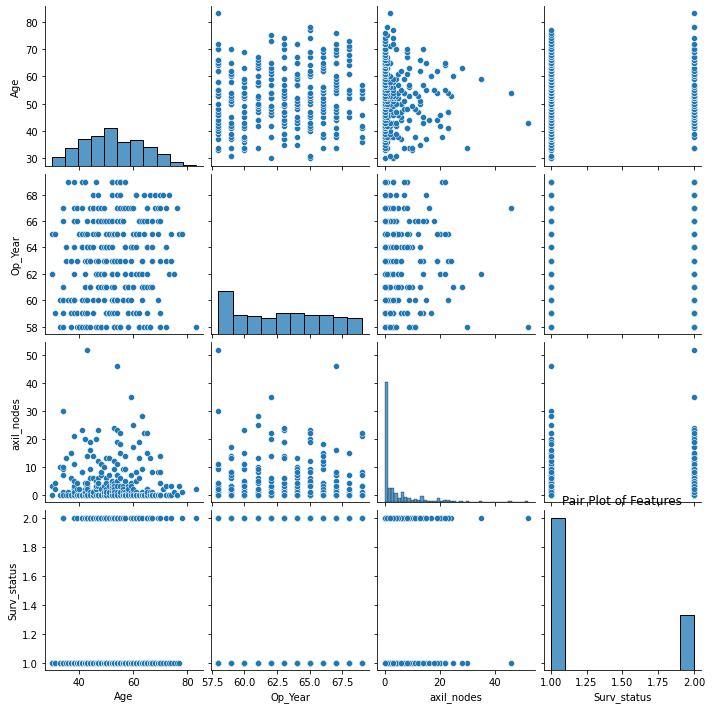


Target Value Counts:
 1    224
2     81
Name: Surv_status, dtype: int64


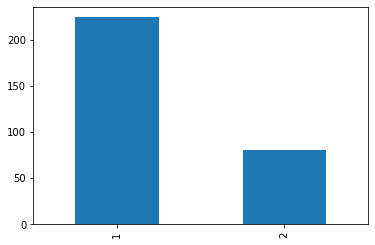

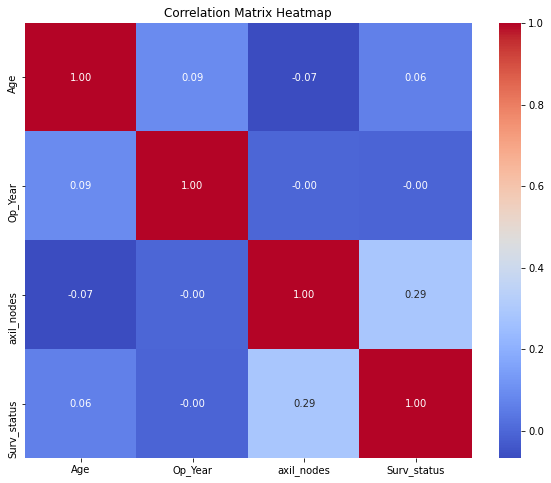

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Measure the relationships between different features
# Visualize relationships using scatter plots
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()

# Visualize the distribution of the Target column according to the count of labels
print(f'\nTarget Value Counts:\n',  df['Surv_status'].value_counts())
# Plot a histogram of the values in the 'Target' column
df['Surv_status'].value_counts().plot(kind='bar')

# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [3]:
import numpy as np
print(np.corrcoef(df['Age'], df['Surv_status'])[0, 1])

0.06435101236634085


In [4]:
from scipy.stats import spearmanr
# Compute Spearman correlation coefficient
spearman_corr, p_value = spearmanr(df['Age'], df['Surv_status'])
print(spearman_corr)

0.05280635739843123


***Observation:*** The comparison of the above correlations indicates a weak positive linear correlation between 'Age' and 'Surv_status'. 

Let's transform the data and compute the correlation between attributes 'Age' and 'axil_nodes'. 

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform 'Age' data
normalized_age = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
normalized_axil_nodes = scaler.fit_transform(df['axil_nodes'].values.reshape(-1, 1))

spearman_corr, p_value = spearmanr(normalized_age, normalized_axil_nodes)
print(spearman_corr)



-0.09788393178416328


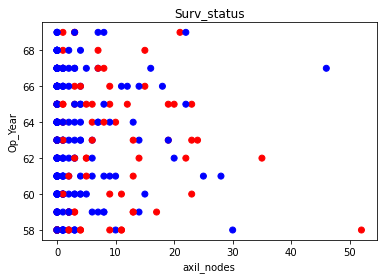

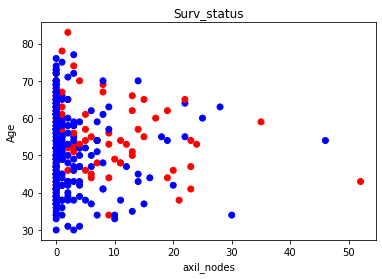

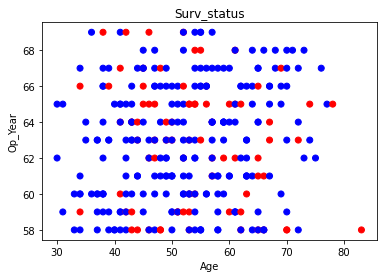

In [14]:
 #Create a 2-D scatter plot indicating the labels of the output 'Surv_status' according to the 'axil_nodes' and 'Op_Year' attributes. Provide your observation.



# Set colors for each label
colors = {1: 'blue', 2: 'red'}

# Plot the scatter plot
plt.scatter(df['axil_nodes'], df['Op_Year'], c=df['Surv_status'].map(colors))

# Set labels and title
plt.xlabel('axil_nodes')
plt.ylabel('Op_Year')
plt.title('Surv_status')

# Show the plot
plt.show()



# Plot the scatter plot
plt.scatter(df['axil_nodes'], df['Age'], c=df['Surv_status'].map(colors))

# Set labels and title
plt.xlabel('axil_nodes')
plt.ylabel('Age')
plt.title('Surv_status')

# Show the plot
plt.show()


# Plot the scatter plot
plt.scatter(df['Age'], df['Op_Year'], c=df['Surv_status'].map(colors))

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Op_Year')
plt.title('Surv_status')

# Show the plot
plt.show()



***Observation***: This scatter plot shows that using 'axil_nodes' as one of the input features can provide a degree of separation. 

Indicate if it makes any sense to perform data transformation (i.e., feature scaling) on the input attribtes of the data (Age, Op-Year, axil_nodes)? Explain your answer.

***Answer:*** When the features are almost within a similar range (scale), there is no need for feature scaling.